In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math
import numpy as np
!pip install shap
import shap




     |████████████████████████████████| 358kB 8.0MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491628 sha256=46ed180c11f13eeb5820100766f7c17195e114171c720e26a912c12c689bf6a9
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
def getData():
  dataset = tf.keras.datasets.boston_housing
  (x_train, y_train),(x_test, y_test) = dataset.load_data()
  return x_train, y_train, x_test,y_test

In [ ]:


def normalizeData(X_train,X_test):
  mean = X_train.mean(axis = 0)
  stdev = X_train.std(axis = 0)

  X_train = (X_train - mean) / stdev
  X_test = (X_test - mean) / stdev

  return X_train,X_test

In [ ]:

def defineModel():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Dense(128,activation='relu'),
                                      tf.keras.layers.Dropout(0.3),
                                      tf.keras.layers.Dense(64,activation='relu'),
                                      tf.keras.layers.Dropout(0.3),
                                      tf.keras.layers.Dense(64,activation='relu'),
                                      tf.keras.layers.Dense(1,activation='linear')
  ])
  return model




In [ ]:
def graphLosses(history):
  fig = go.Figure()
  fig.add_trace(go.Scattergl(y=history.history['loss'],
                    name='Train'))
  fig.add_trace(go.Scattergl(y=history.history['val_loss'],
                    name='Valid'))
  fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
  fig.show()


In [ ]:
def graphError(history):
  fig = go.Figure()
  fig.add_trace(go.Scattergl(y=history.history['mae'],
                    name='Train'))
  fig.add_trace(go.Scattergl(y=history.history['val_mae'],
                    name='Valid'))
  fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Mean Absolute Error')
  fig.show() 

In [ ]:

def showFeatureImportance(model,X_train,X_test):
  shap.initjs()
  explainer = shap.DeepExplainer(model,X_train[:100])
  shap_values = explainer.shap_values(X_test[:100])
  shap.summary_plot(shap_values, X_test, plot_type='bar')

In [ ]:
def main():
  x_train,y_train,x_test,y_test = getData()
  x_train,x_test = normalizeData(x_train,x_test)
  model = defineModel()
  model.compile(optimizer = 'adam',loss='mse',metrics = ['mae'])
  history = model.fit(x_train,y_train,epochs = 20,verbose = 0,validation_split = 0.05)

  graphLosses(history)
  graphError(history)

  mse_test,mae_test = model.evaluate(x_test,y_test)
  print("Mean Squared Error on test set: ", mse_test)
  print("Mean Absolute Error on test set: ",mae_test)

  showFeatureImportance(model,x_train,x_test)
  

 


57344/57026 [==============================] - 0s 0us/step


4/4 [==============================] - 0s 3ms/step - loss: 22.6694 - mae: 3.3322
Mean Squared Error on test set:  22.669416427612305
Mean Absolute Error on test set:  3.3321921825408936


array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40016407, -0.48361547, -0.97229967, ...,  0.01092523,
         0.43839573,  0.01644913],
       [-0.40341568,  2.04394792, -1.20161456, ..., -1.30866202,
         0.41052179, -1.06421256],
       [-0.40255104, -0.48361547, -1.31186211, ...,  0.10193124,
         0.41850097, -1.03936976]])>]
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


array([[ 1.55369355e+00, -4.83615471e-01,  1.02832580e+00, ...,
         7.84476371e-01, -3.48459553e+00,  2.25092074e+00],
       [-3.92426750e-01, -4.83615471e-01, -1.60877730e-01, ...,
        -3.07595832e-01,  4.27331262e-01,  4.78801191e-01],
       [-3.99829269e-01, -4.83615471e-01, -8.69401957e-01, ...,
         7.84476371e-01,  4.48077135e-01, -4.14159358e-01],
       ...,
       [-2.93446785e-02, -4.83615471e-01,  1.02832580e+00, ...,
         7.84476371e-01, -2.48065648e-03, -1.02832852e+00],
       [-3.97229936e-01, -4.83615471e-01,  2.53653041e-01, ...,
         1.01931244e-01,  4.27012095e-01, -8.22685359e-01],
       [-2.07095066e-01, -4.83615471e-01,  1.24588095e+00, ...,
        -1.71818909e+00,  3.70519489e-01, -1.49344089e+00]])>]
Consider rewriting this model with the Functional API.


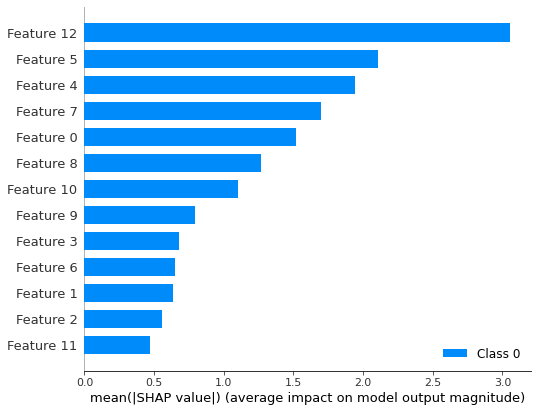

In [ ]:
main()

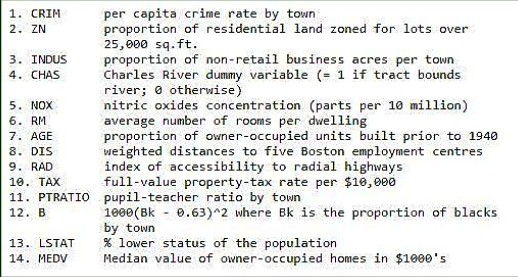

 **Results of Experiment**
 
 
  Based on the statistics outputted from the evaluate() function, the model has a mean absolute error of 3.4793, which essentially means that the average prediction that the model predicts is within roughly 3500 dollars of the actual amount, as the output prediction is measured in the thousands of dollars. Given that the average error is relatively insignficant compared to the overall value than the home, this model did its job very well. Additionally, both the Loss v.s Epoch and Error v.s Epoch graphs showed a convergence between the training and validation loss/error, thereby indicating that the model didn't overfit the dataset, which is a problem as this dataset doesn't have a large amount of data.

  The last thing that we will do is to see whether or not the significance of each feature found by the shap library makes sense through the use of a correlation heatmap. 

In [ ]:
import pandas as pd
import seaborn as sns

def correlation_heat_map(x_train,y_train):
  
  house_data_X = pd.DataFrame(x_train)
  house_data = house_data_X.assign(MEDV = y_train)

  correlation_matrix = house_data.corr().round(2)
  # annot = True to print the values inside the square
  sns.heatmap(data=correlation_matrix, annot=True)
  



In [ ]:
def test():
  x_train,y_train,x_test,y_test = getData()
  correlation_heat_map(x_train,y_train)

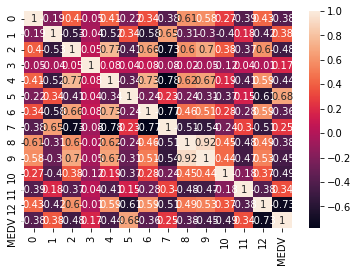

In [ ]:
test()

By looking at the final column of the matrix, we can see that the features with the largest correlation with the median price are feature 12(% Lower Status of Population) as it has a strong negative association with a correlation coefficient of -0.73, which indicates that an increase in the percentage of lower status people leads to an uptick in the median value of the home. On the other hand, feature 5(Number of Rooms in the Dwelling) had the highest positive correlation with the output with a correlation coefficient of 0.68, signalling a moderately strong positive association between the number of rooms and the median value of the house which makes sense logically. This heatmap also corroborates the output of the shap library, which had features 12 and 5 as having the largest effect on the output of the model, thereby indicating that the model looks for strong correlations in order to make its predictions.